# Регресія.

Регресія - це один з методів який використовується для розуміння зв'язків між незалежними змінними (властивостями) та залежними змінними. Після того, як ці зв'язки були визначені, залежні змінні можна передбачати.

## Лінійна регресія.

### Проста лінійна регресія.
Проста лінійна регресія - це регресійна модель, яка визначає відносни між однією незалежною та однією незалежною змінною використовуючи пряму лінію. Формула такої моделі:
$ \hat{y} = b_{0} + b_{1}x_{1}$, де
<br> $ \hat{y}$ - залежна змінна, значення якої треба передбачити;
<br> $ x_{1}$ - незалежна змінна, яка використовується у передбаченні;
<br> $ b_{0}$ - точка, у якій графік перетинає вісь _y_. Зазвичай константа;
<br> $ b_{1}$ - коефіцієнт схилу.

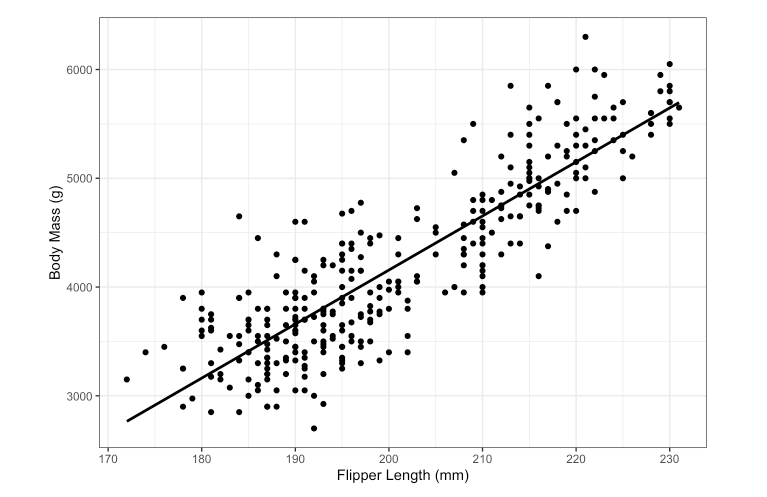

У випадку простої лінійної регресії питання полягає у тому, щоб знайти таку пряму, яка найкраще опище наявні дані. Для цього підходить метод найменших квадратів. Кожна точка з даних проектується на пряму регресії, яка розглядається. У цьому випадку координата _y_ точки даних буде $ y_{i}$, а координати точки, куди спроетквалась точки даних - $ \hat{y_{i}}$. Підбір найкращої прямої регресії відбувається через визначення такої прямої, щоб різниця між уcіма $ y_{i}$ та $ \hat{y_{i}}$ була найменша.

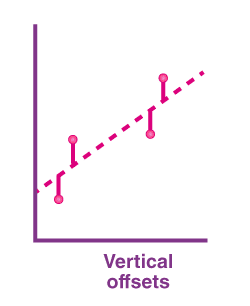

#### Імпорт бібліотек.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Завантаження даних та поділ на тренувальні та тестові дані.

In [17]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
X = df.iloc[:, :-1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
y = df.iloc[:, -1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Створення моделі.

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### Тренування моделі.

In [22]:
regressor.fit(X_train, y_train)

LinearRegression()

#### Передбачення результатів тестових даних.

In [23]:
y_pred = regressor.predict(X_test)

#### Візуалізація даних.

Text(0.5, 1.0, 'Тренувальні дані')

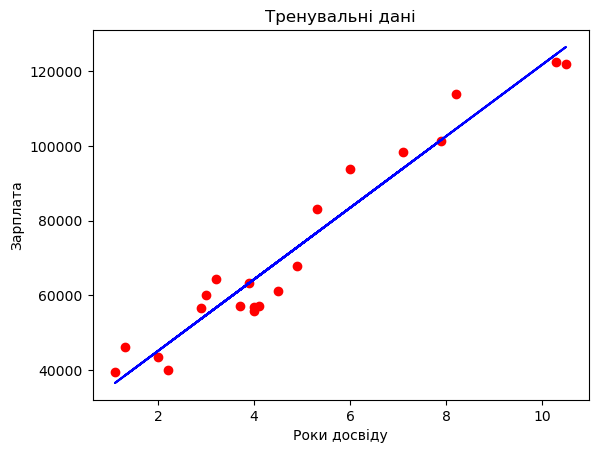

In [24]:
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Роки досвіду')
plt.ylabel('Зарплата')
plt.title('Тренувальні дані')

Text(0.5, 1.0, 'Тренувальні дані')

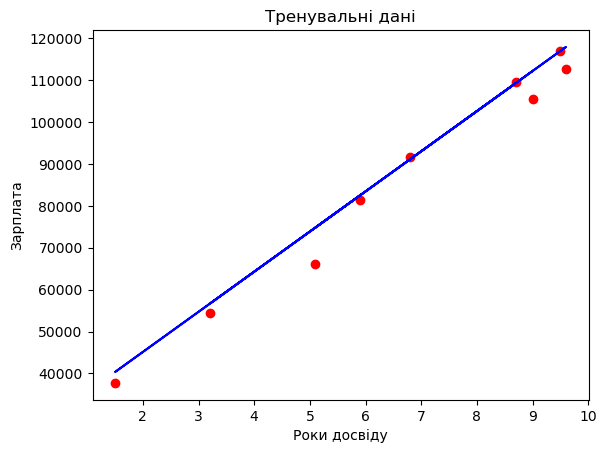

In [25]:
plt.plot(X_test, y_pred, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('Роки досвіду')
plt.ylabel('Зарплата')
plt.title('Тренувальні дані')

## Методи оцінювання регресійних моделей.

Три основні метрики оцінювання регресійних моделей:

**Середня абсолютна похибка (Mean Absolute Error)** (MAE):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Середньоквадратична похибка (Mean Squared Error)** (MSE):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Корінь середньоквадратичної похибки (Root Mean Squared Error)**:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Порівняння метрик:

- **MAE** найпростіша до розуміння, бо це середня помилка.
- **MSE** більш поширена за  MAE, бо вона бере до уваги більші помилки, що є корисним у реальному світі;
- **RMSE** ще поширеніше, бо RMSE можна інтерпретувати у одиницях _y_.

Це все є **функції втрат** тому, що необхідно їх мінімізувати.

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3038.6823612518824
MSE: 17978409.49734413
RMSE: 4240.095458517901


### Множинна лінійна регресія.

Множинна лінійна регресія працює за у такий спосіб, як і проста лінійна регресія, але тут не одна незалежна змінна, а декілька.
Формула виглядая таким чином:

$ \hat{y} = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}$, де
_n_ - кількість незалежних змінних.

#### Вичитування даних.

In [27]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
X = df.iloc[:, :-1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [29]:
y = df.iloc[:, -1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

#### Кодування категоріальних змінних.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

#### Розділ на тестовий та тренувальний набори.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#### Створення та тренування моделі.

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Передбачення значень для тестових даних.

In [33]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 86894.76  89949.14]
 [153481.03 132602.65]
 [119836.84 111313.02]
 [ 98459.9   97427.84]
 [118555.74 110352.25]
 [189726.   191792.06]
 [114295.31 105733.54]
 [ 61551.3   49490.75]
 [ 70236.86  71498.49]
 [ 47600.77  42559.73]]


#### Оцінка моделі.

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7068.317931601373
MSE: 83628721.14303157
RMSE: 9144.874036477024


## Припущення лінійних моделей.
Перед використанням моделей лінійної регресії необхідно переконатись, що вона буде працювати так як треба. 
Квартет Анскомбе - це чотири послідовності з ідентичними значеннями простих статистичних властивостей, але їхні графіки істотно відрізняються. На прикладі цих графіків видно, що у трьох з чотирьох випадків застосування лінійної регресії дасть неправильні результати.
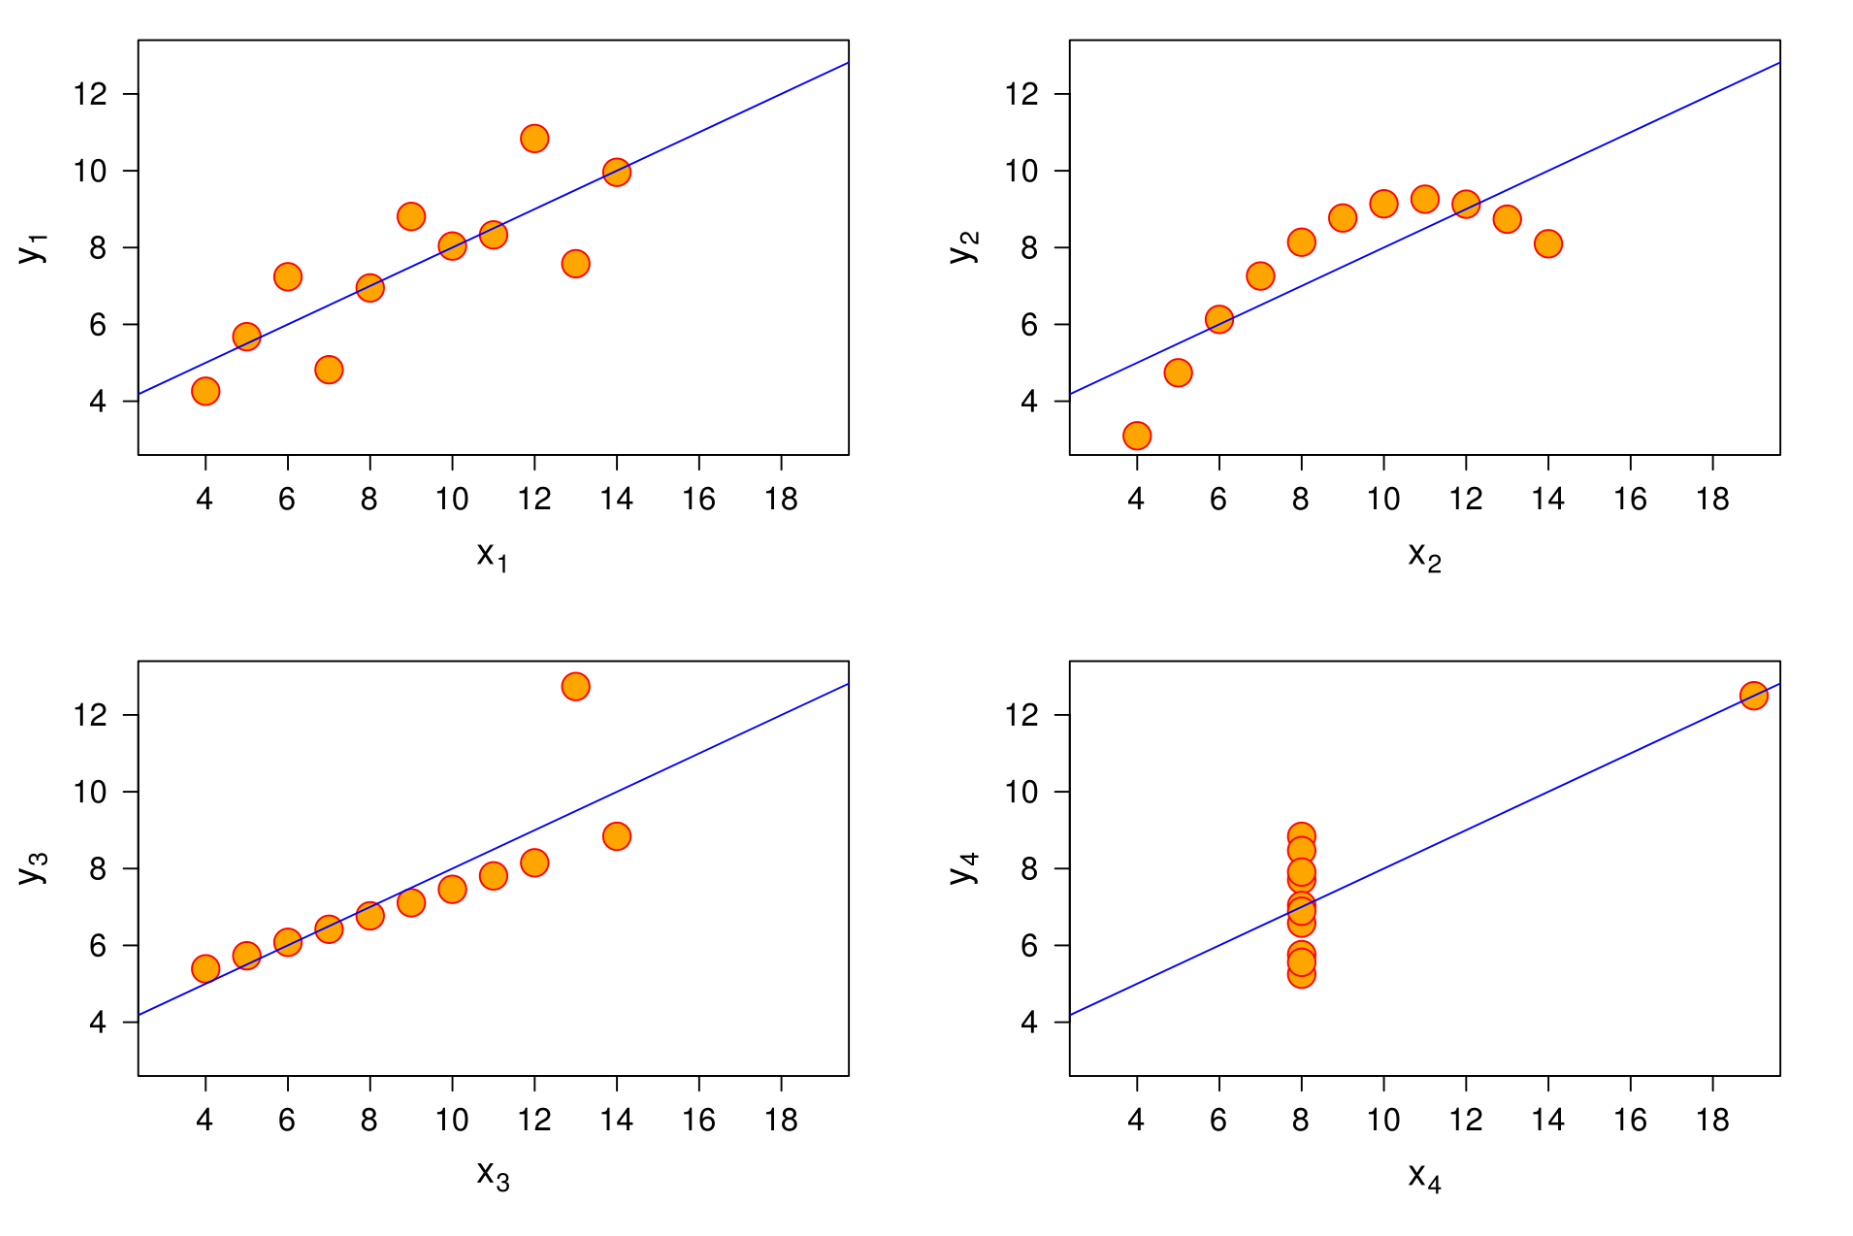

Тому перед тим як використовувати лінійну регресію необхідно переконатись, що набір даних підходить для використання. Для цьоого використовуються припущення лінійної регресії. Всього їх є 5:
1. Лінійність - необхідно переконатись, що є лінійна зележність між залежними та незалежними змінними;
2. Гомоскедастичність - необхідно переконатись, що є рівна варіативність;

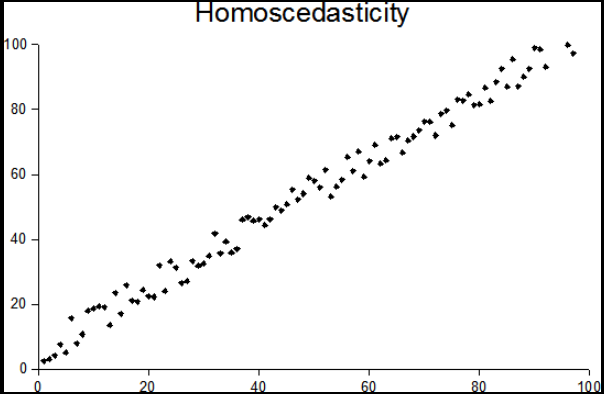

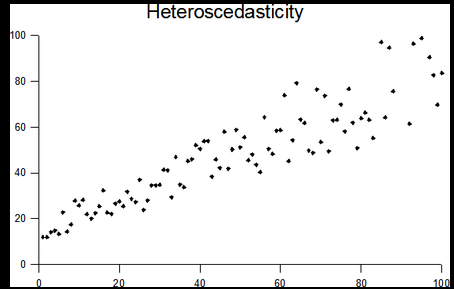

3. Багатовимірний нормальний розподіл - має бути нормальний розподіл точок даних;

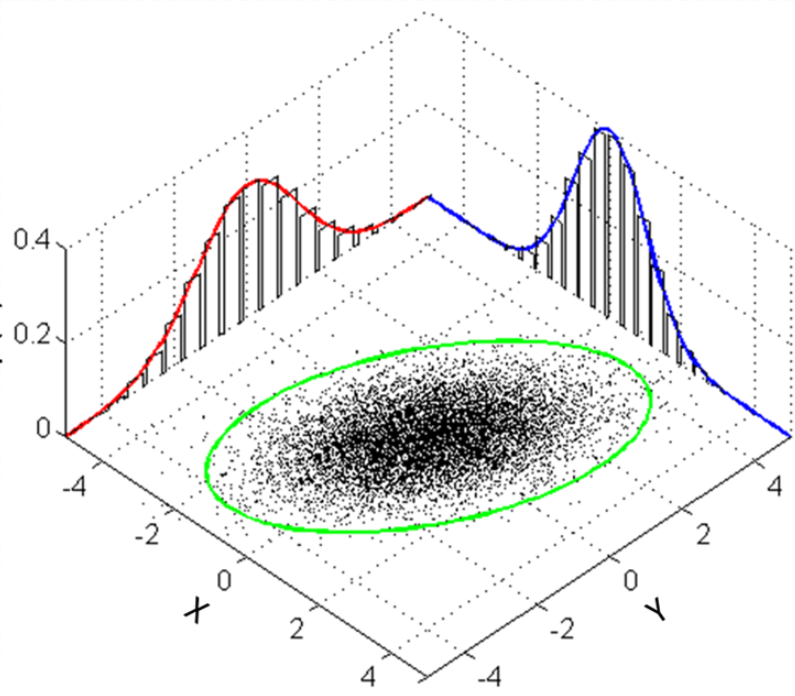

4. Незалежність спостережень. В це також включається відсутність автокореляції - це означає, що у даних має бути відсутнім шаблон, який можна відслідкувати;
5. Відсутність мультиколінеарності - незалежні змінні не мають корелювати між собою.

## Поліноміальна лінійна регресія.

Полімоніальна лінійна регресія - це форма регресійного аналізу, де відношення між незалежними та залежними змінними моделюються як поліном _n_-ого степеня.
Формула:
$ y = b_{0} + b_{1}x_{1} + b_{2}x_{1}^{2} + ... + b_{n}x_{1}^{n}$
Чому ця модель все ще лінійна? Лінійність та нелінійність відносяться не до степеня _Х_. Ця лінійність стосується степенів біля _Х_, тобто $b_{0}, b_{1}, b_{2}, ... , b_{n}$.
Нелінійною регресія стає тоді, коли не є можливим замінити коефіцієнти таким чином, щоб регресія перетворилась на лінійну.
Поліноміальна лінійна регресія є спеціальним випадком множинної лінійної регресії, а не окремим тип регресії.

### Вичитування даних.

In [35]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [36]:
X = df.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [37]:
y = df.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

### Створення та тренування моделі.

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # вказує на максимальний степінь поліноміальних властивостей.
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

### Візуалізація результатів.

#### Лінійна регресія.

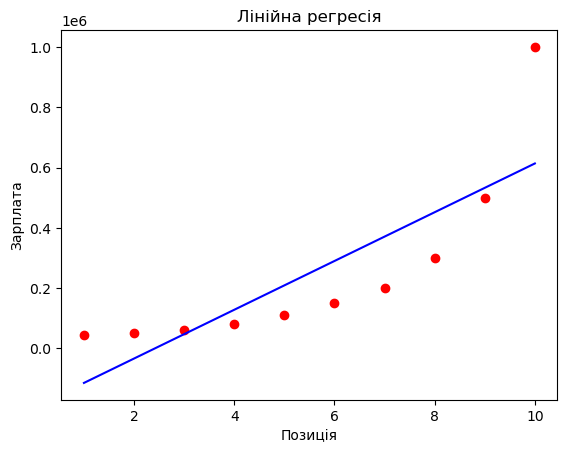

In [40]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Лінійна регресія')
plt.xlabel('Позиція')
plt.ylabel('Зарплата')
plt.show()

#### Поліноміальна регресія.

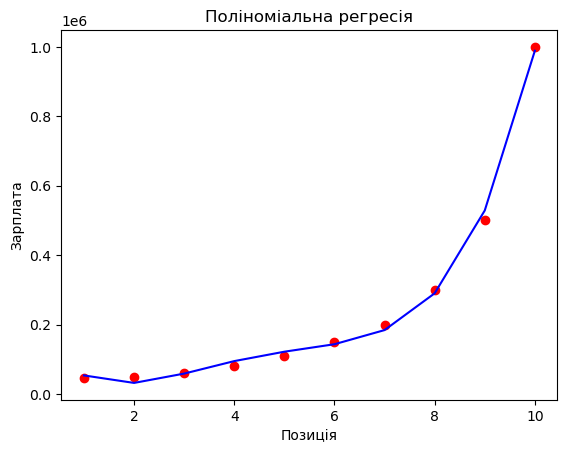

In [41]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Поліноміальна регресія')
plt.xlabel('Позиція')
plt.ylabel('Зарплата')
plt.show()

## Опорна векторна регресія.

Опорна векторна регресія (support vector regression) - це алгоритм машинного навчання з вчителем, який використовується щоб передбачати дискретні значення. Використовуються такий самий принцип, як і SVC.

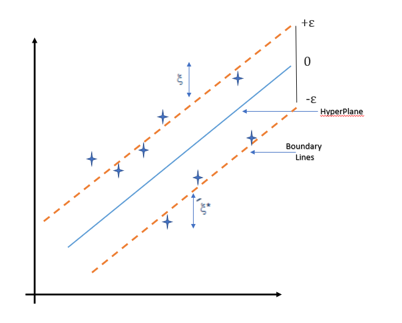

Працює наступним чином - окрім прямої схилу враховуються ще відхилення, яке вимірюється вертикально, не перпендикулярно до прямої схилу. Це означає, що коли точки попадають у окреслену область, вони не вважаються помилками і вони не будуть впливати на подальші розрахунки. Ті ж точки, які попали за межі області вважаються помилками і вони беруть участь у розрахунках. Обраховуються відстані від таких точок до межі області та шукаються такі точки, щоб сума їх відстаней була мінімальна. 

### Масштабування даних. 

In [42]:
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X

array([[-1.57],
       [-1.22],
       [-0.87],
       [-0.52],
       [-0.17],
       [ 0.17],
       [ 0.52],
       [ 0.87],
       [ 1.22],
       [ 1.57]])

In [43]:
y

array([[-0.72],
       [-0.7 ],
       [-0.67],
       [-0.6 ],
       [-0.49],
       [-0.35],
       [-0.17],
       [ 0.18],
       [ 0.88],
       [ 2.64]])

### Створення та тренування моделі.

In [44]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.reshape(len(y),))

SVR()

In [45]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.02]])

### Візуалізація.

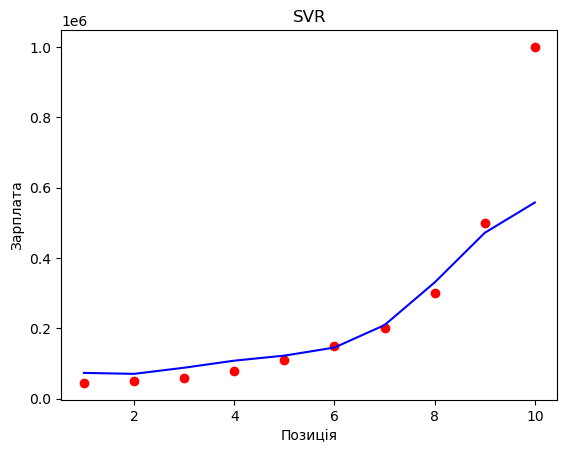

In [46]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Позиція')
plt.ylabel('Зарплата')
plt.show()

## Регресія з деревами прийняття рішень.

Працюють за таким самим принципом, як і дерева прийняття рішень при класифікації.

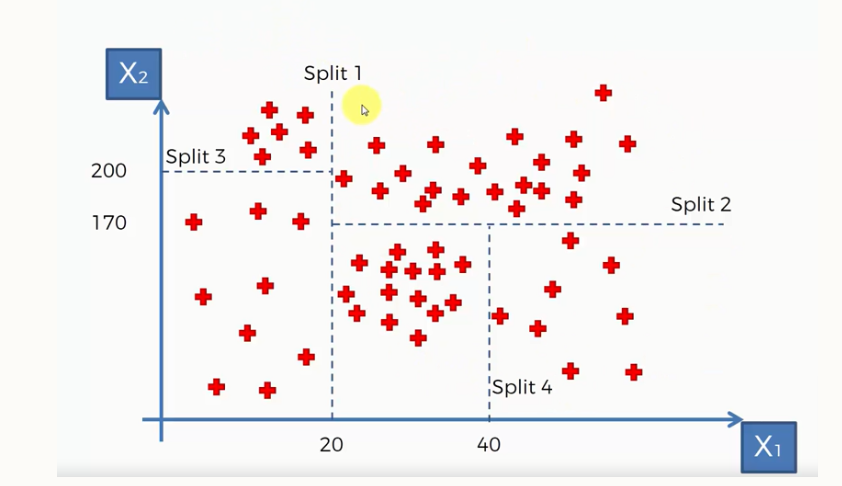
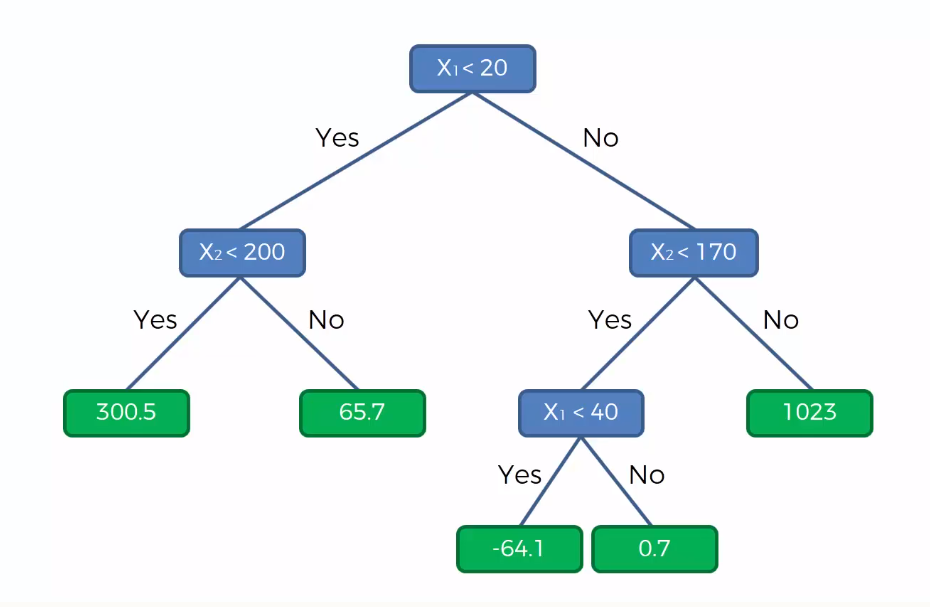

### Створення та тренування моделі.

In [47]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 101)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=101)

### Візуалізація результатів.

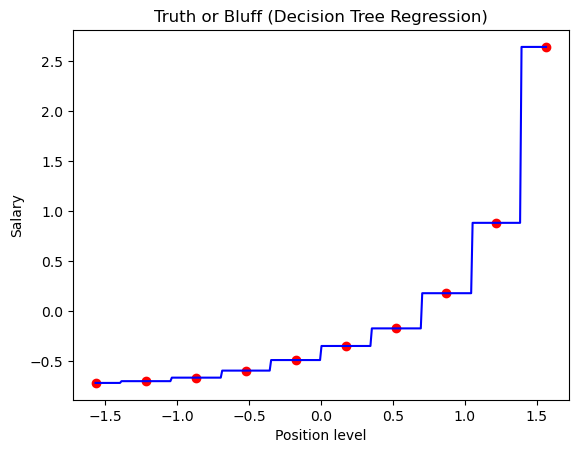

In [48]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()